# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig

import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte

import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)
/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-dd7ff94a-84d5-491b-b559-8b8f1c42000e.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask492_expose_gallery_notebook_config'
  hash='561a88354'
  # Last commits:
    * 561a88354 dchoi127 Config from env                                                   (10 minutes ago) Sat Aug 5 00:38:07 2023  (HEAD -> SorrTask492_expose_gallery_notebook_config, origin/SorrTask492_expose_gallery_notebook_config)
    * d7431cc30 dchoi127 Expose config gallery notebook                                    (   8 hours ago) Fr

# Build config

In [4]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [5]:
# Set inputs.
srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7

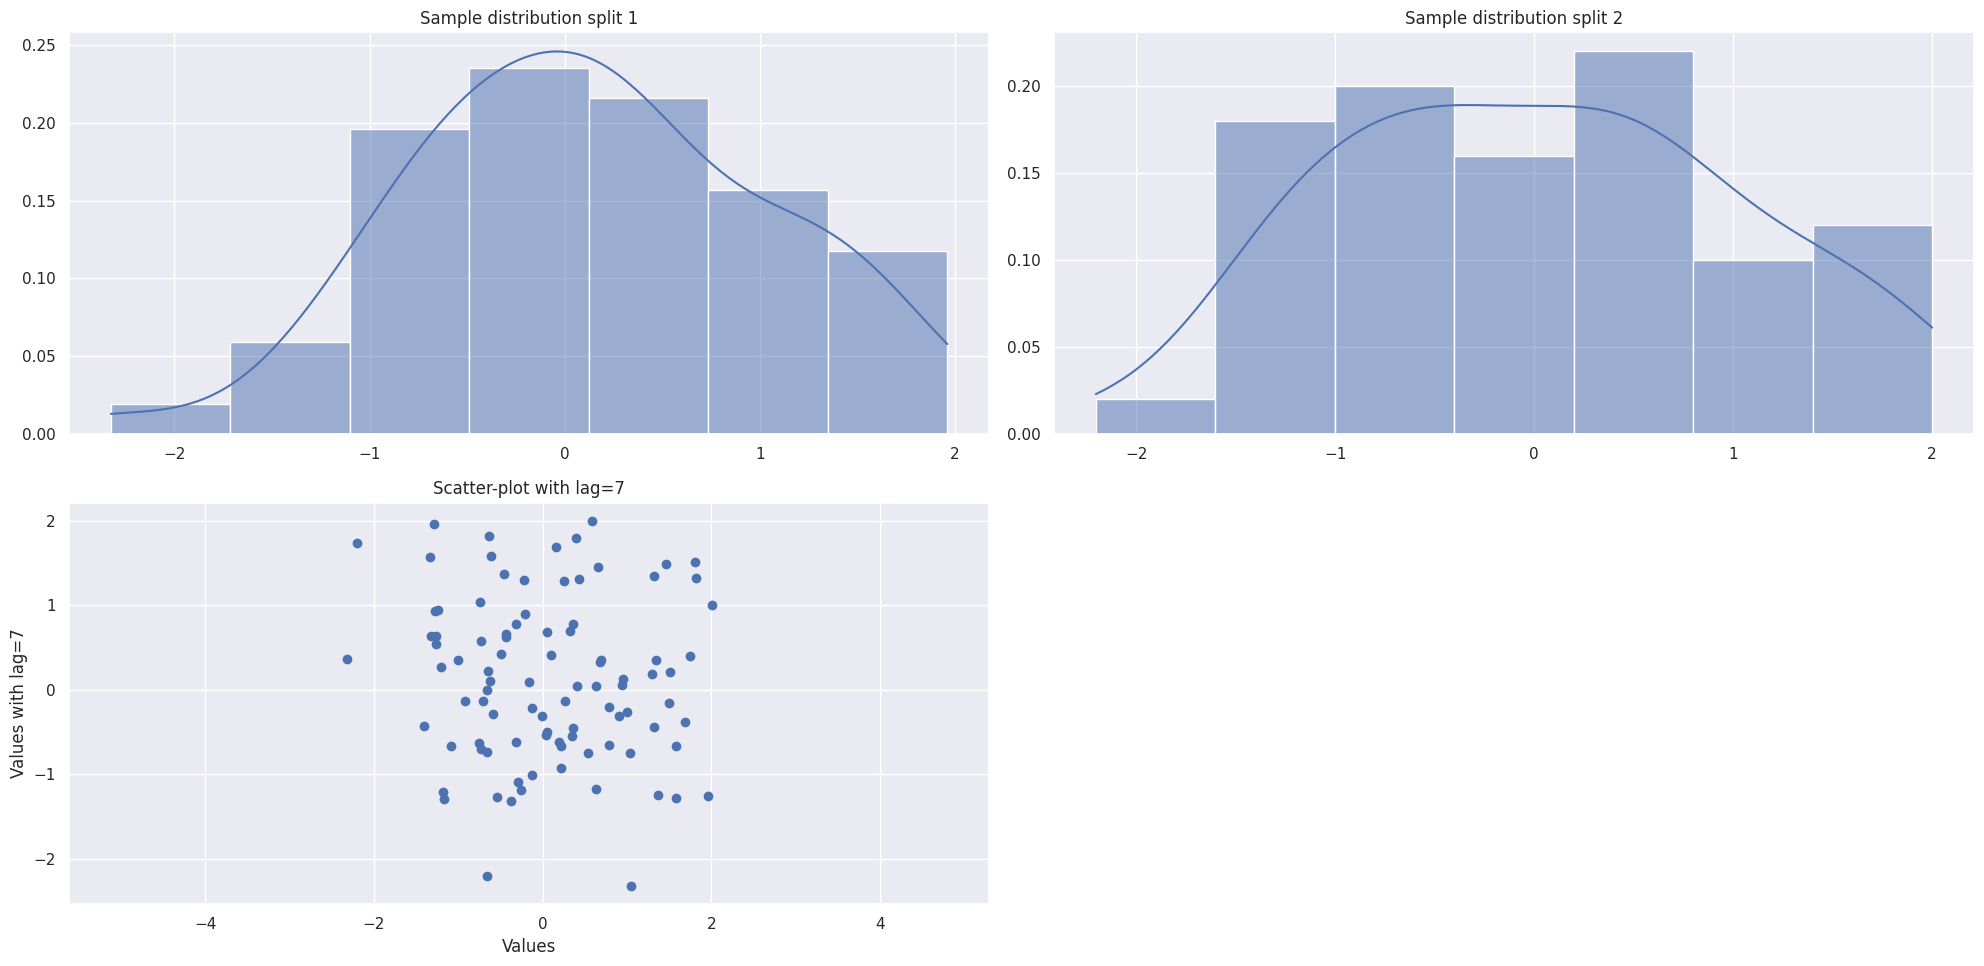

In [6]:
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
cpvistte.plot_histograms_and_lagged_scatterplot(
    srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

In [7]:
# Set inputs for hour interval.
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()

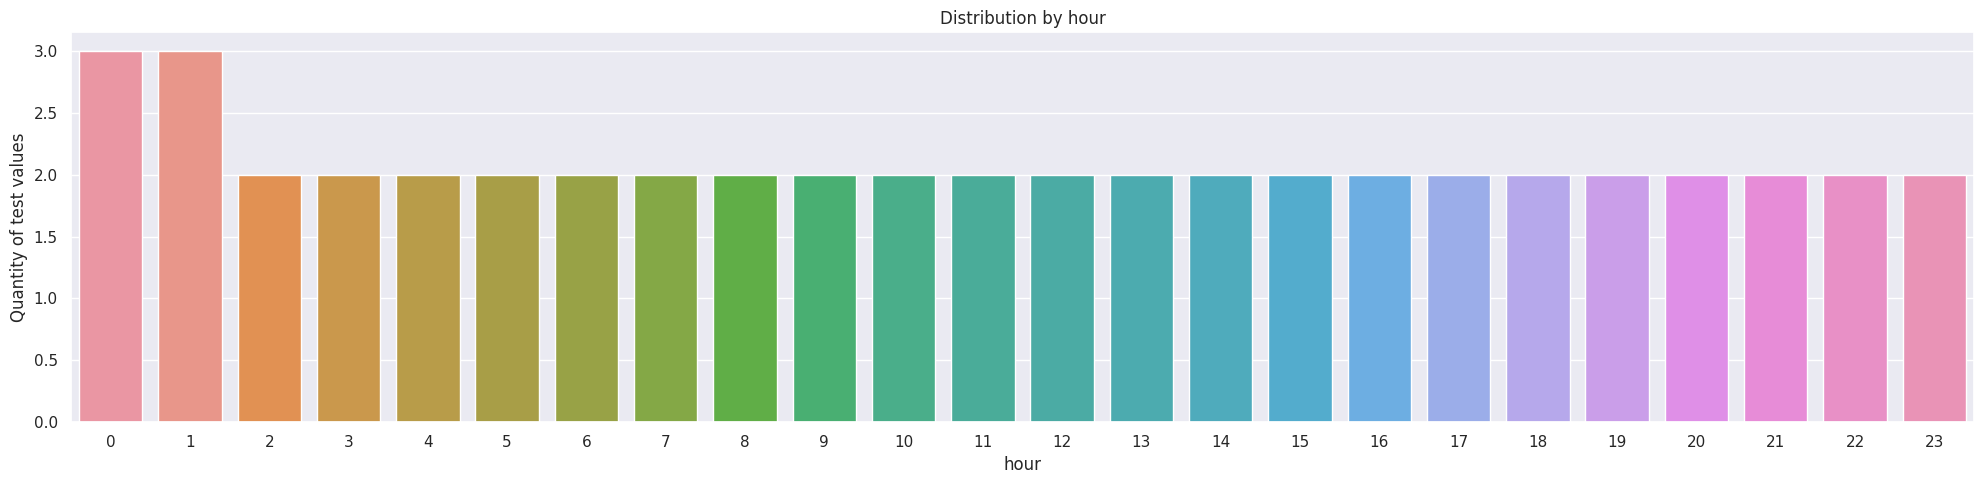

In [8]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

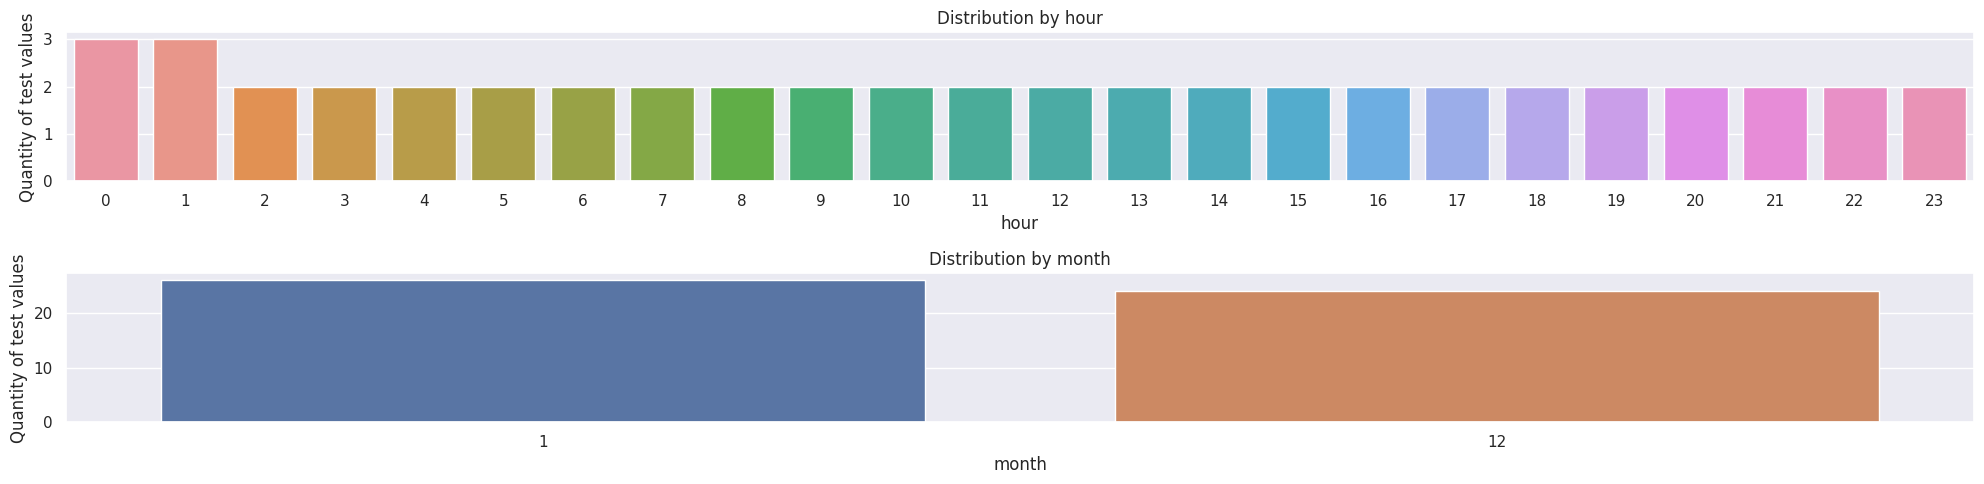

In [9]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

## `plot_time_series_by_period()`

In [10]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

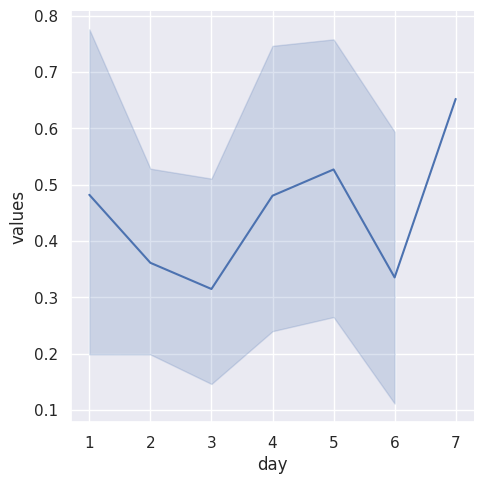

In [11]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

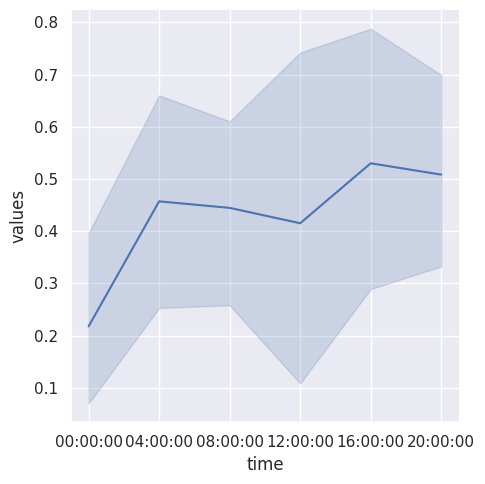

In [12]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

In [13]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap1()

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


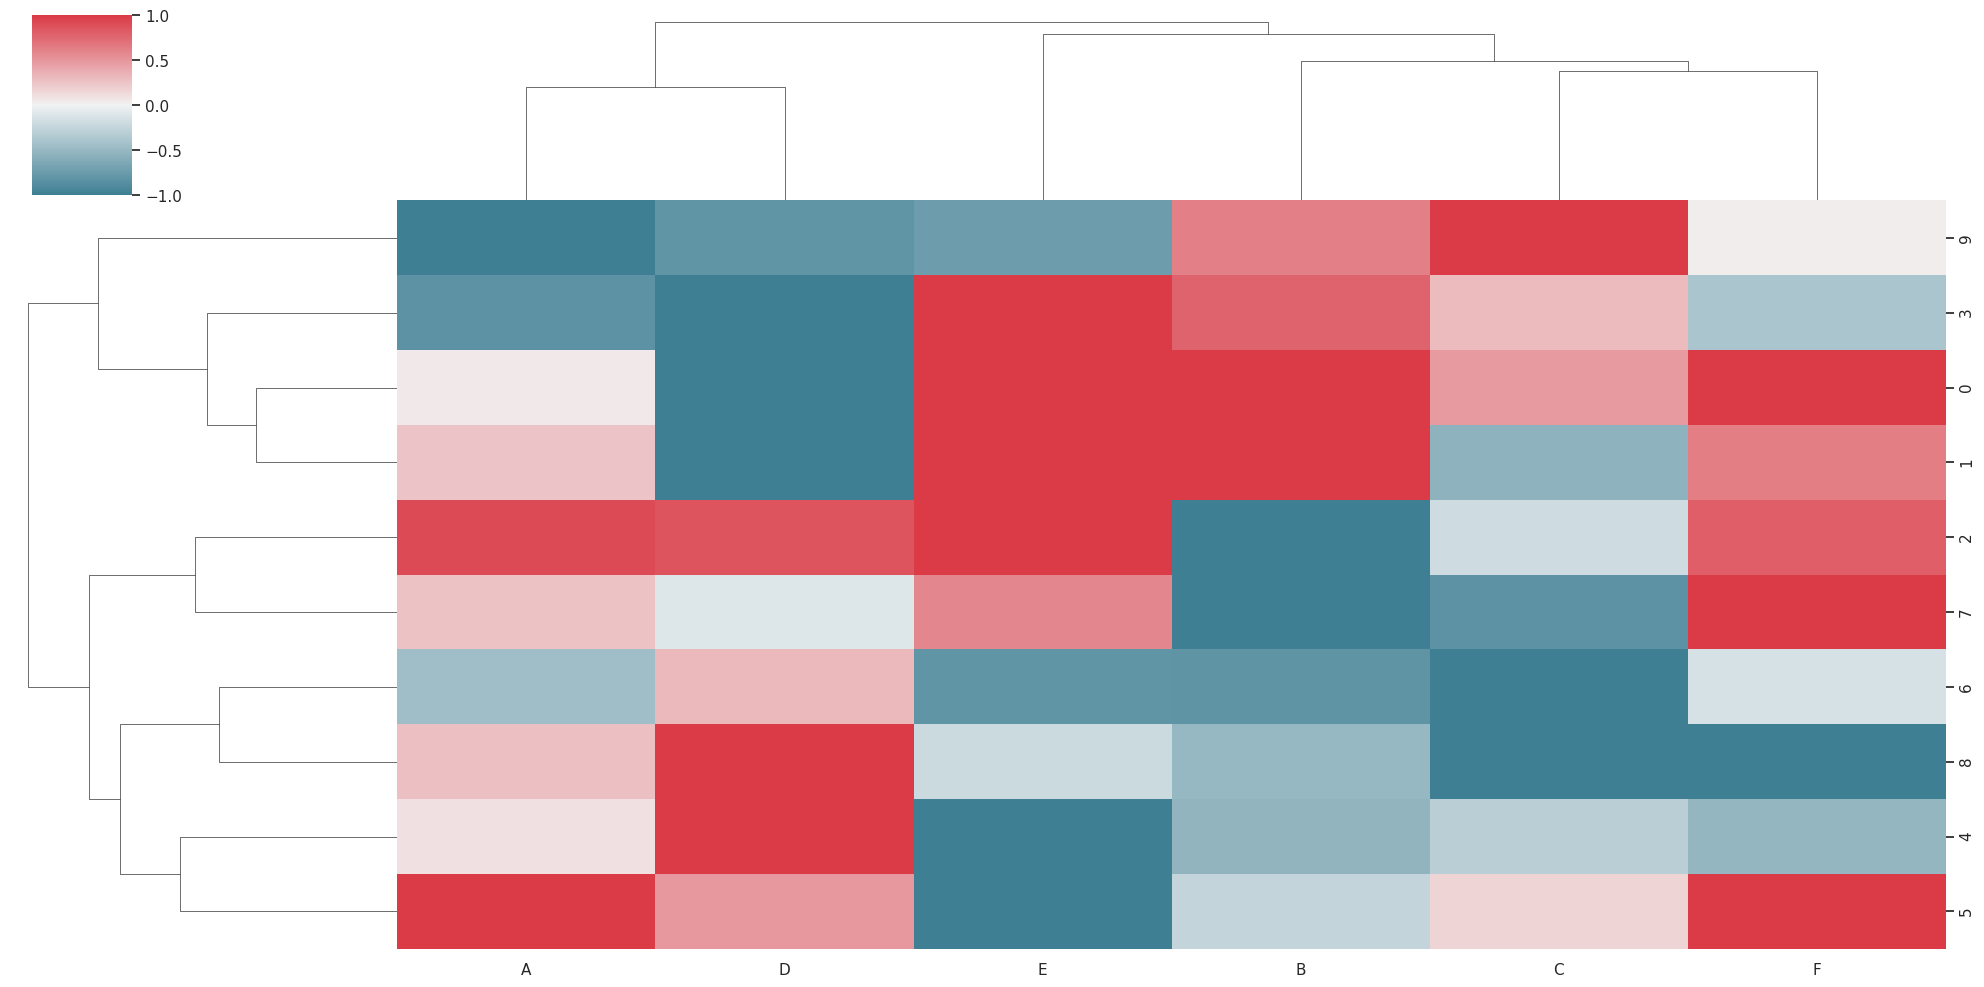

In [14]:
cplocorr.plot_heatmap(corr_df, mode, figsize=config["figsize"])

## `plot_rets_signal_analysis()`

In [15]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.614GB vms=3.094GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.616GB vms=3.096GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


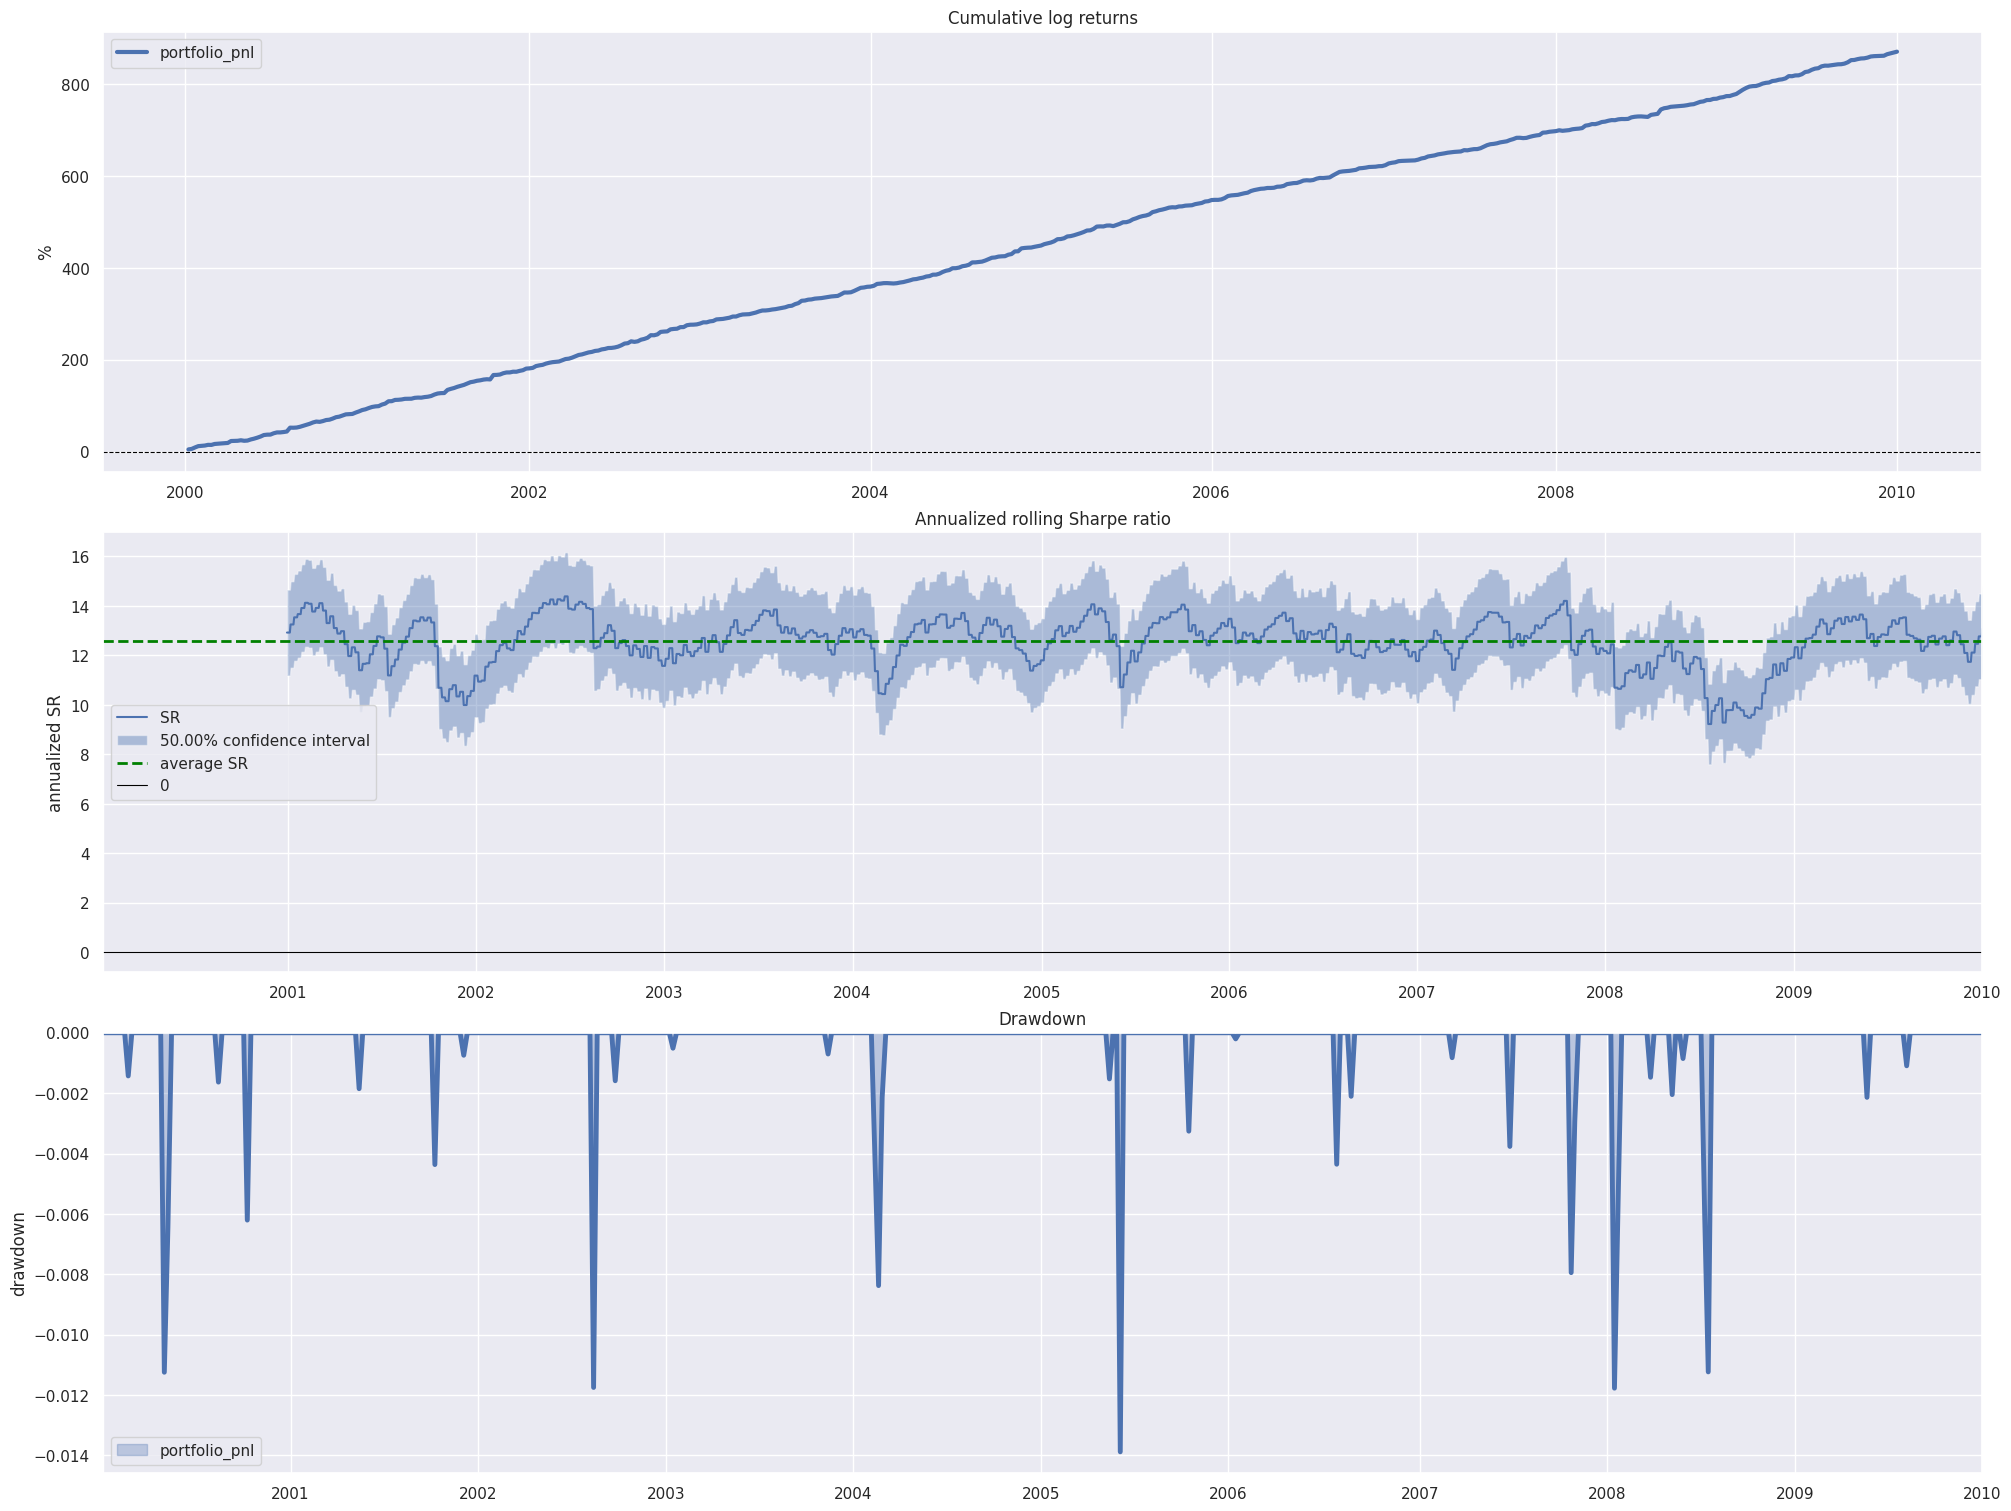

In [16]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.629GB vms=3.108GB mem_pct=16%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


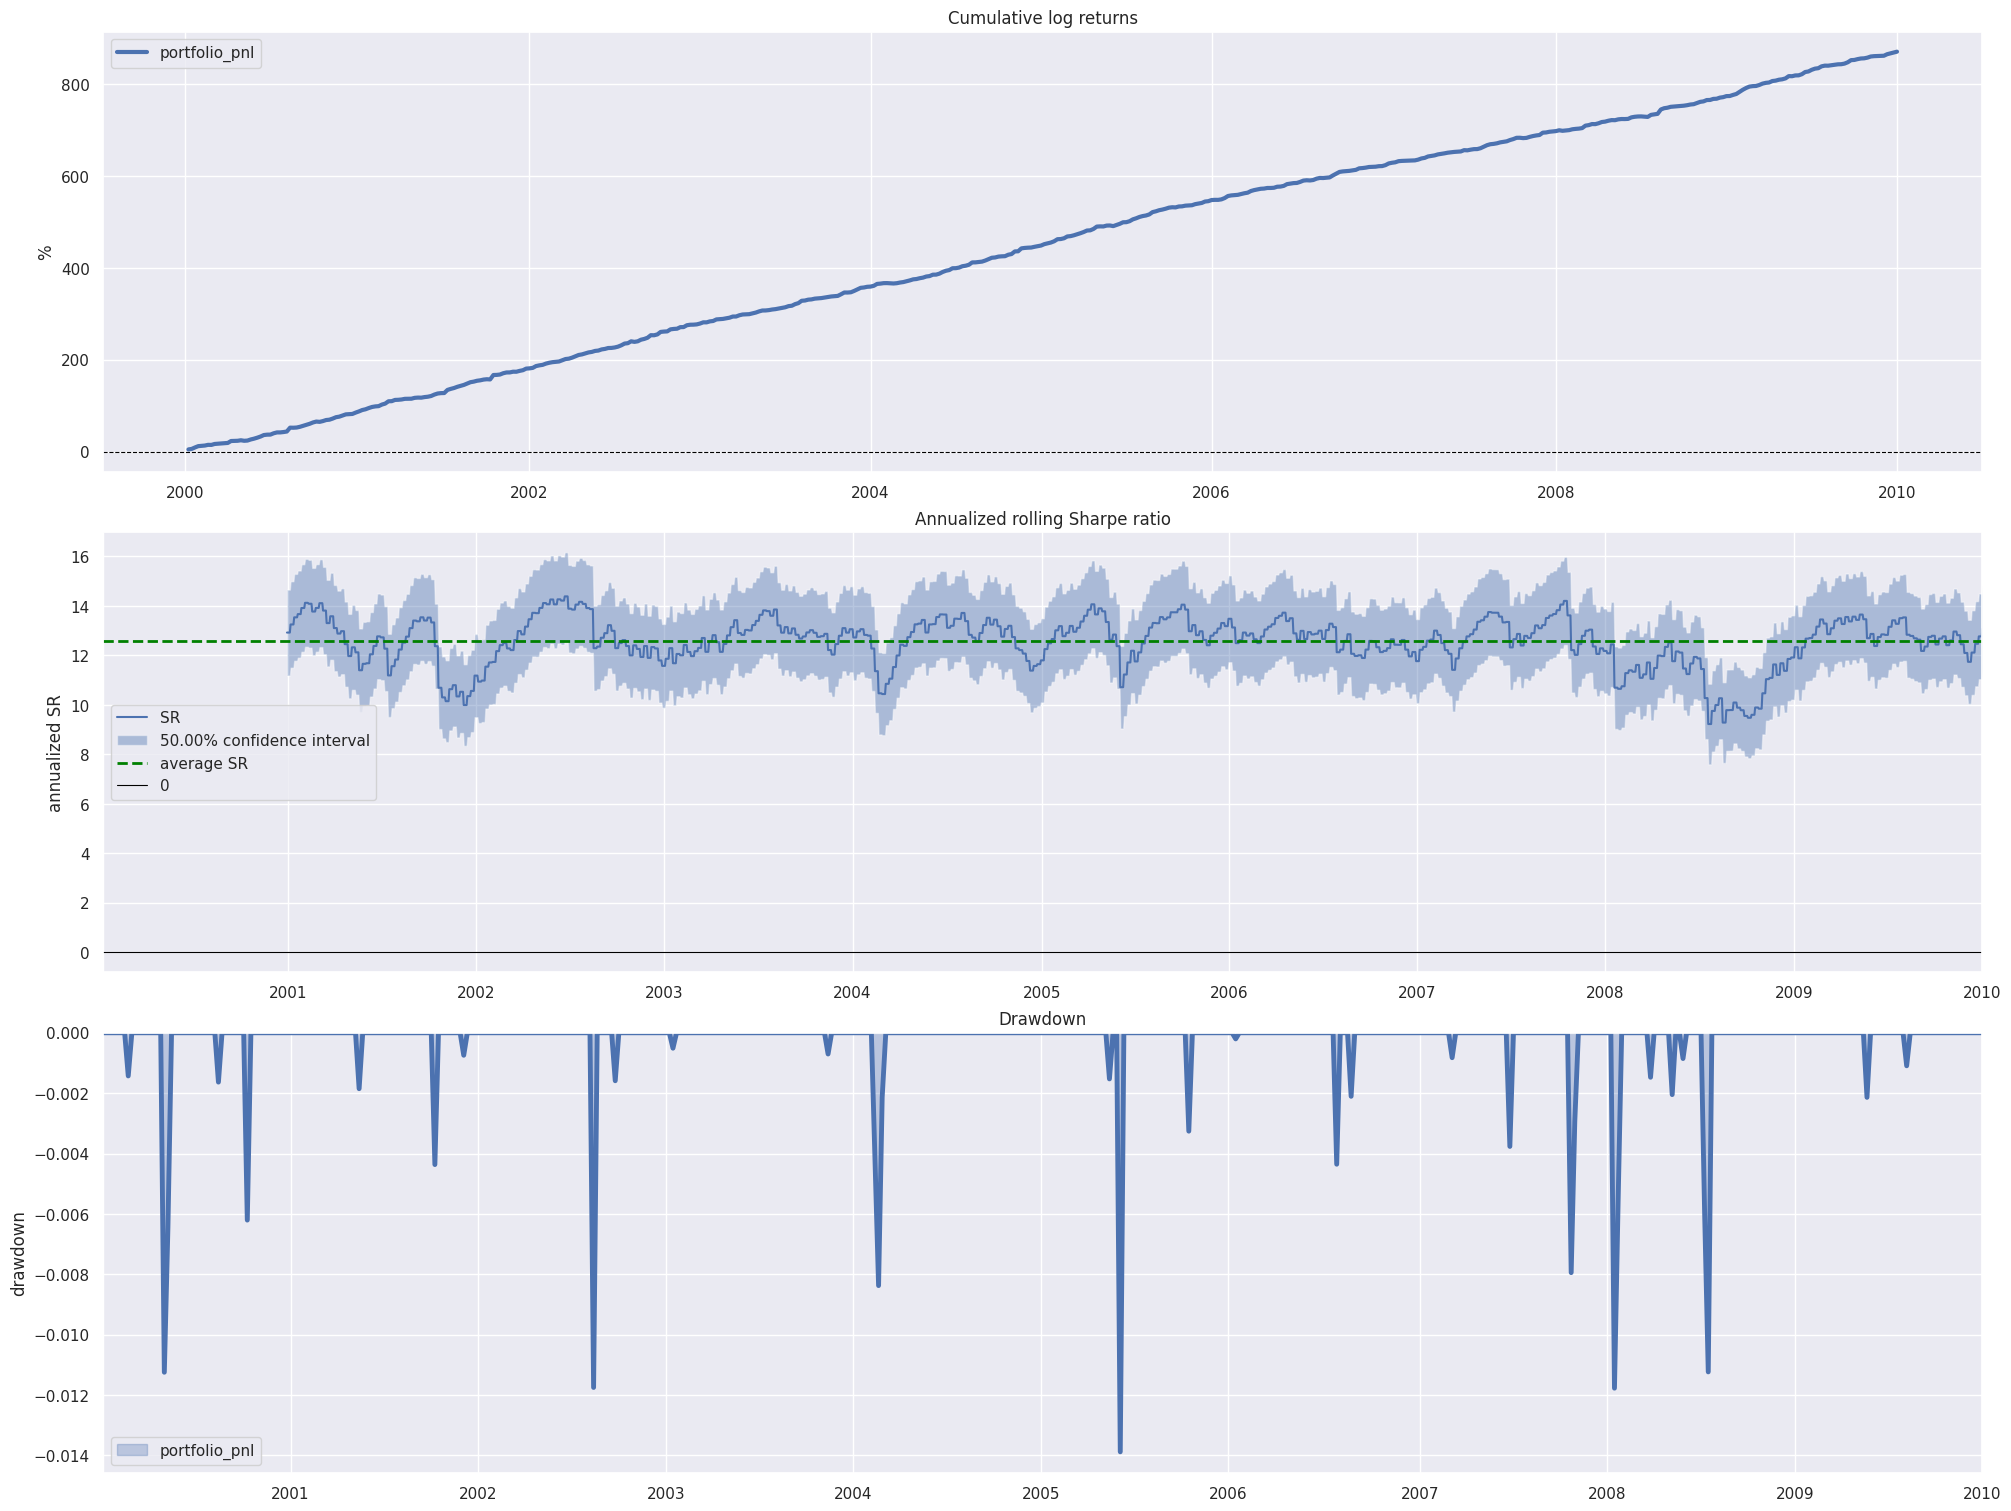

In [17]:
# Set inputs.
evaluator, eval_config = cdmttme.get_example_model_evaluator()
# Build the ModelPlotter.
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

In [18]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_effective_correlation_rank1()

[3.816757617251698, 3.64677955142647, 2.6809952191943682]

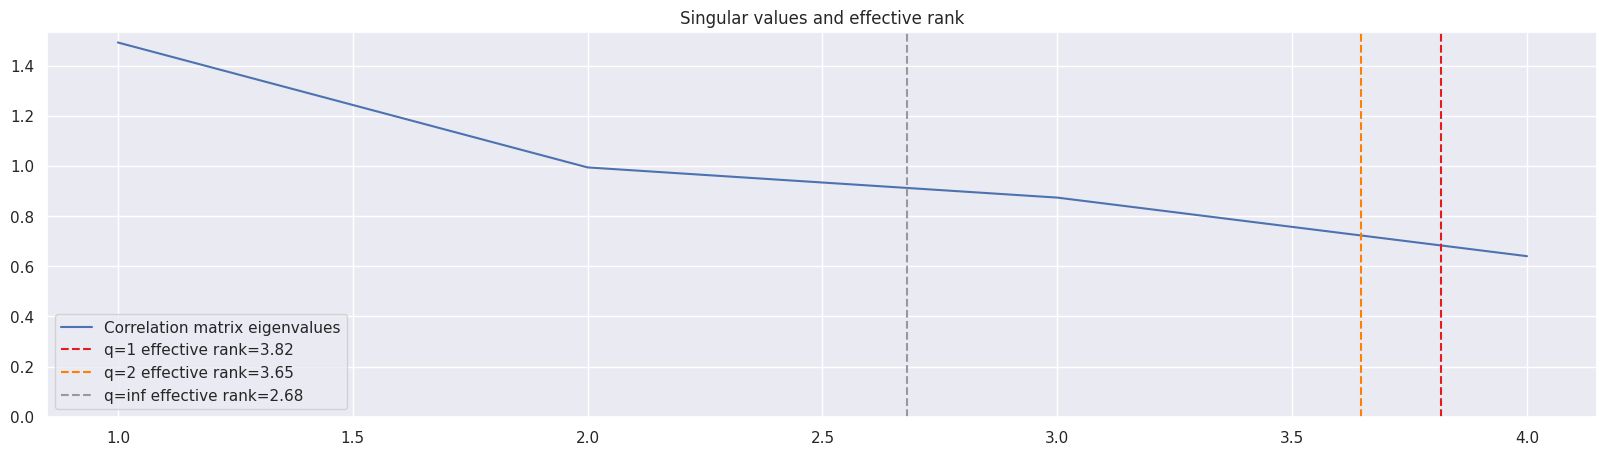

In [19]:
cplocorr.plot_effective_correlation_rank(test_df)

[3.3300197797952547,
 3.1249513450186495,
 3.745288911836722,
 3.6756644714784157,
 3.135404490753311]

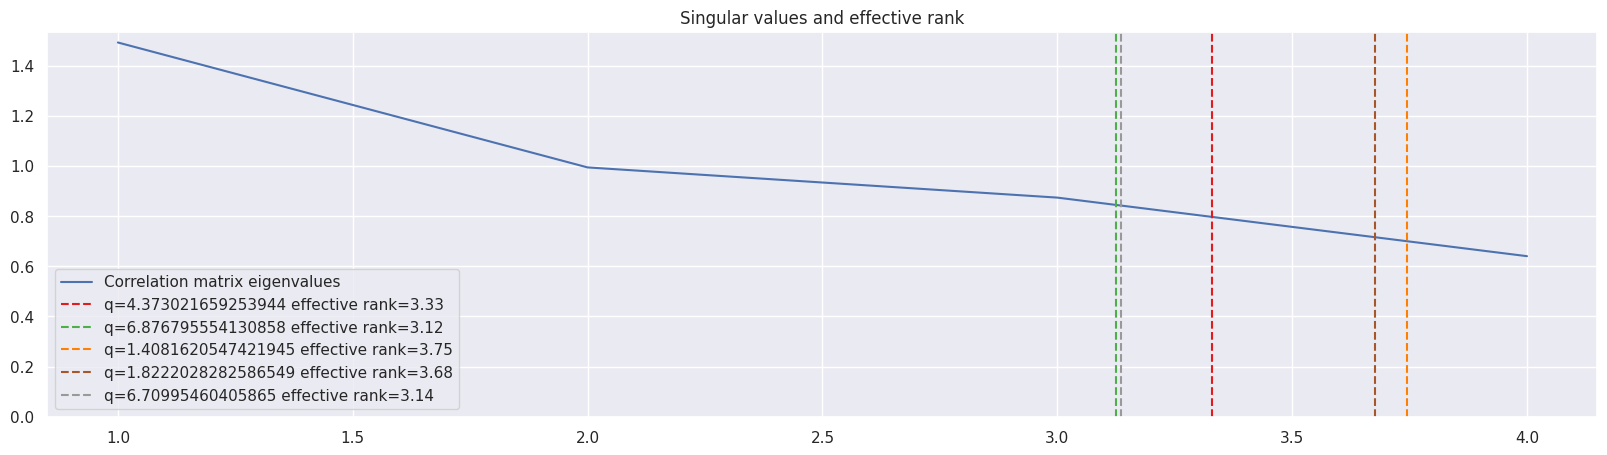

In [20]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [21]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_spectrum1()

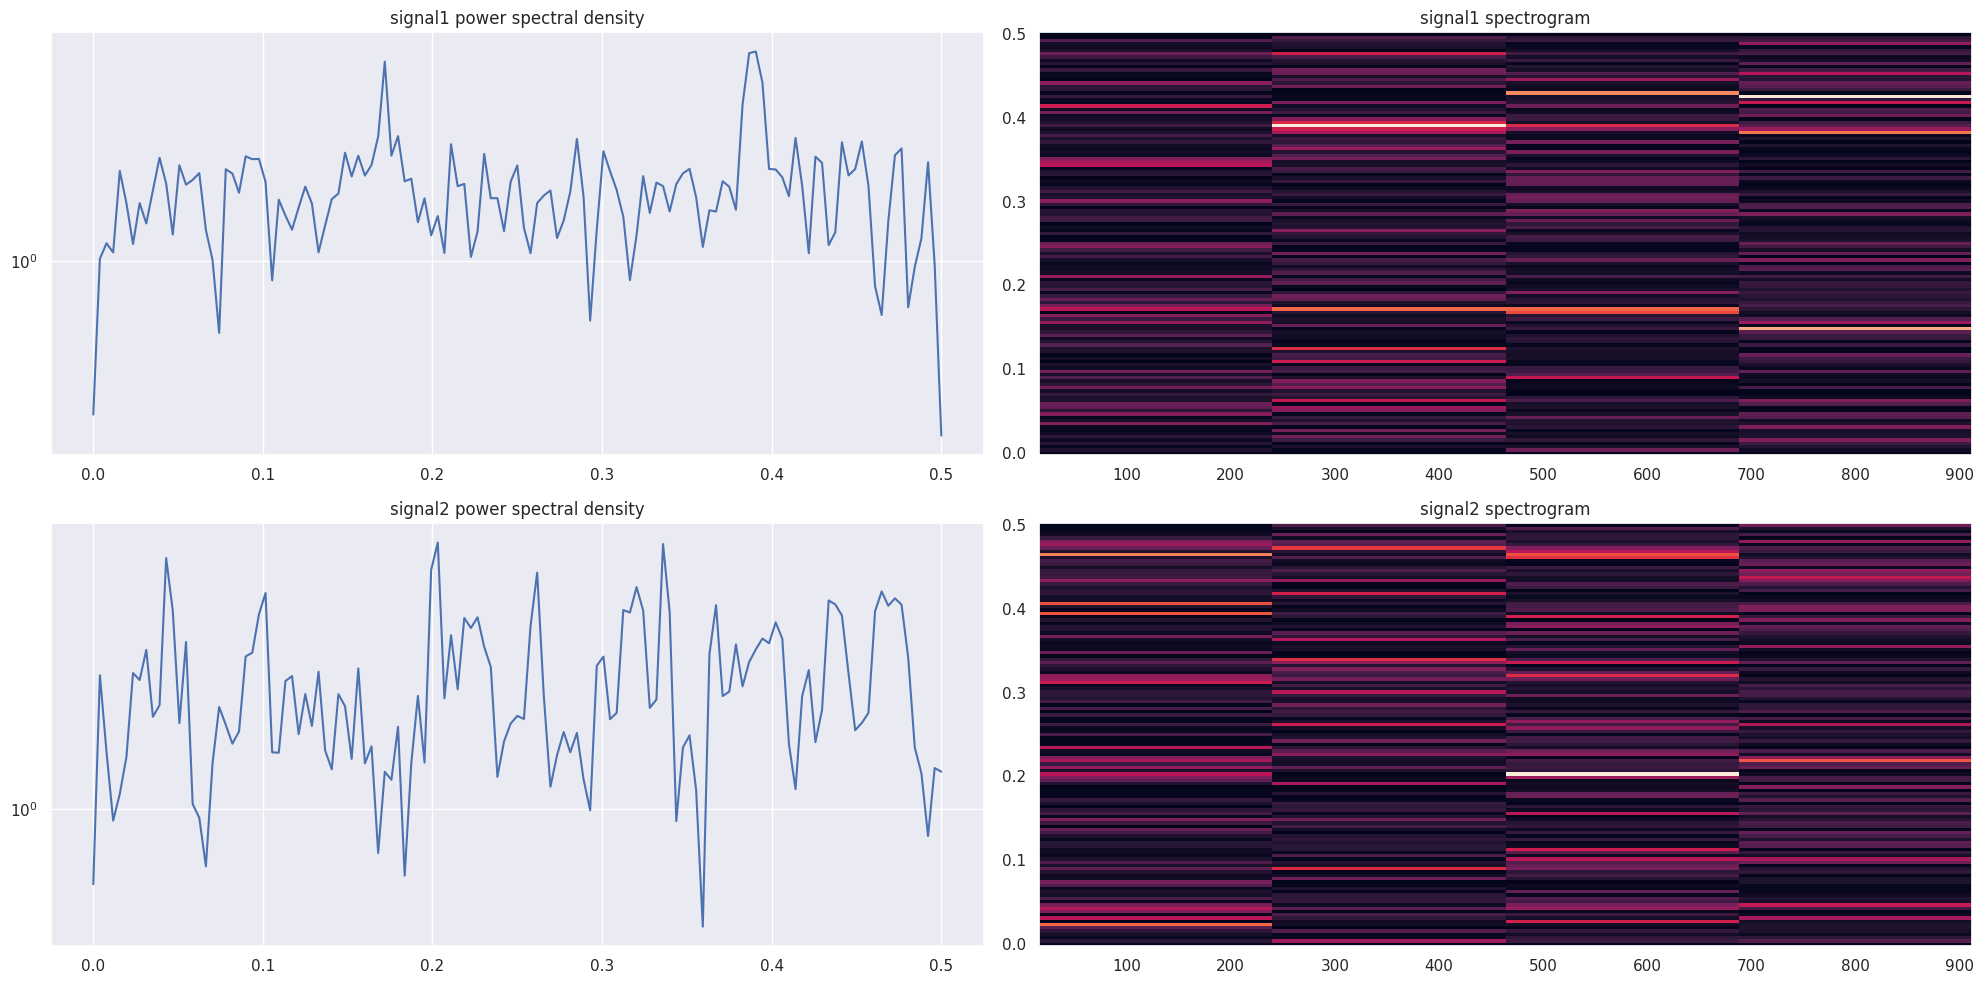

In [22]:
cplmiplo.plot_spectrum(test_df)

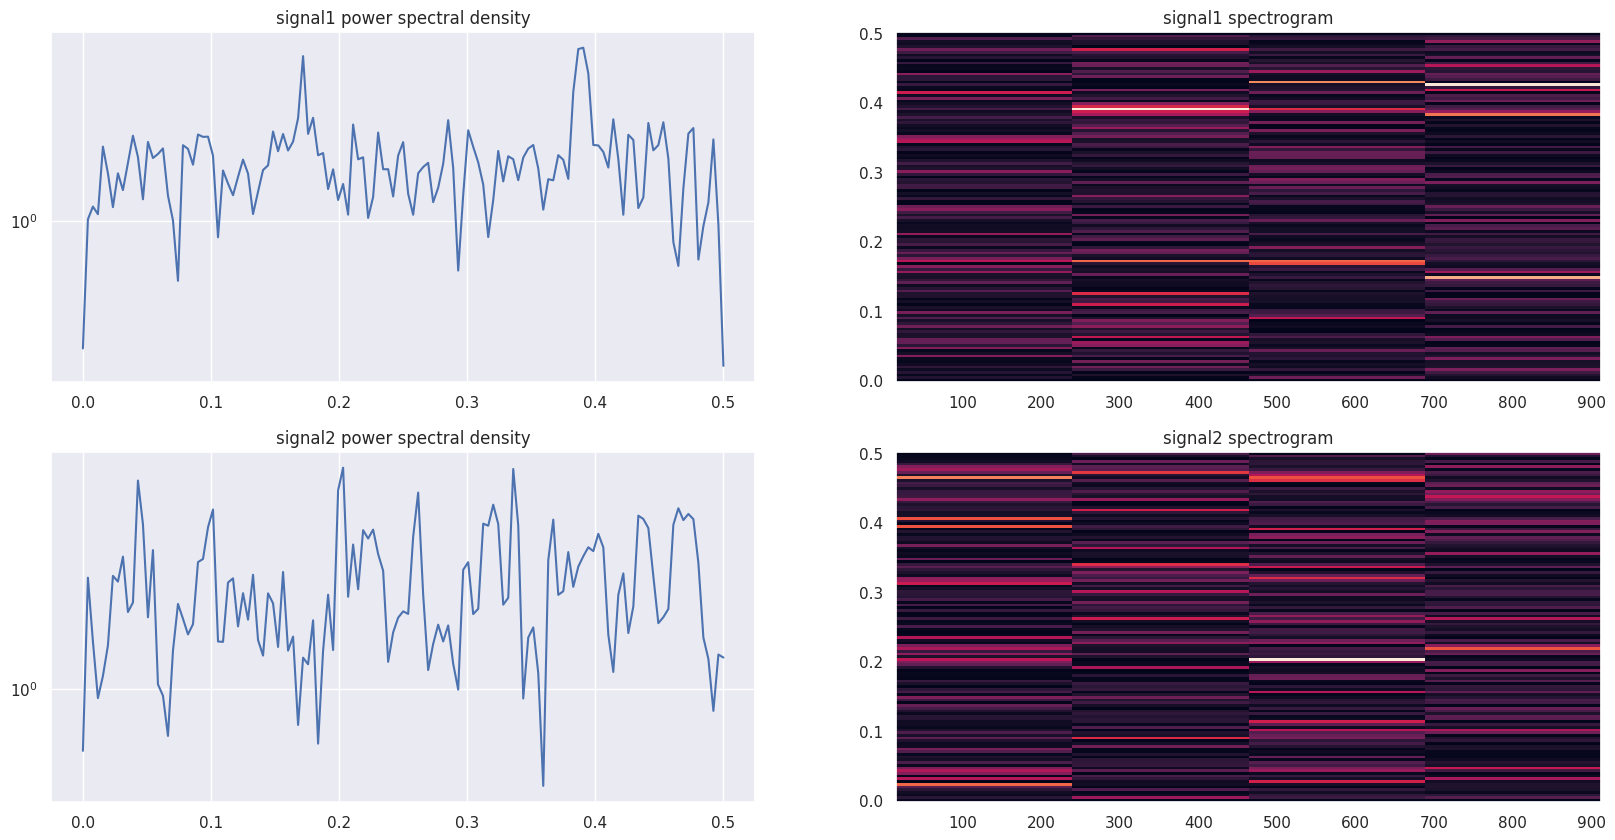

In [23]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)